<h1 style="color: #A5FAB0;font-weight: bold">Parte 2</h1>

## Problema da Localização de Facilidades P-Centros

### Variáveis do problema

J : Conjunto de nós j que representam os clientes

I : Conjunto de locais i candidatos a localização

$q_{i}$ : Demanda do cliente j

$c_{ij}$ : Distância do cliente j à facilidade localizada em i

$CS_{i}$ : Capacidade mensal de suprimento do CD i (em toneladas)

$D_{j}$ : Demanda mensaal da cidade j (em toneladas)

$x_{ij}$ : 1 se o cliente j é atendido pela facilidade localizada em i, 0 caso contrário

$y_{i}$ : 1 se a facilidade é aberta no local i, 0 caso contrário

r : Distância máxima de um cliente quando designado a uma facilidade

In [1]:
#%pip install gurobipy

In [2]:
from itertools import product
from matplotlib import pyplot as plt
from math import sqrt
import gurobipy as gp
from gurobipy import GRB
import numpy as np

----

<h2 style="color: #A5FAB0;font-weight: bold">Instância 1</h2>

In [3]:
P = 5
Q = 6

#Dados da Instância

vCustos = [
    [16750, 3200, 8220, 9780, 8120, 30800],
    [14600, 15520, 11640, 600, 3465, 13200],
    [19250, 19200, 17100, 3000, 6650, 8800],
    [3800, 10840, 6516, 6270, 4655, 25531],
    [9220, 13168, 8400, 3048, 2177, 19767]
]

vDemanda = [10, 8, 12, 6, 7, 11]

vCapacidade = [18, 24, 27, 22, 31]

vCustoFixo = [7650, 3500, 5000, 4100, 2200]

# Adicionando os dados em listas e dicionários
CDs = list()

for i in range(P):
    CDs.append(f'CD{i + 1}')

cidades = list()

for i in range(Q):
    cidades.append(f'cidade{i + 1}')

custos = dict()

for i in range(P):
    for j in range(Q):
        inP = CDs[i]
        inQ = cidades[j]
        custos[inP, inQ] = vCustos[i][j]

demanda = dict()

for i in range(Q):
    aux = cidades[i]
    demanda[aux] = vDemanda[i]

capacidade = dict()
custoFixo = dict()

for i in range(P):
    aux = CDs[i]
    capacidade[aux] = vCapacidade[i]
    custoFixo[aux] = vCustoFixo[i]

# Inicializando o modelo de otimização

m = gp.Model()

# Variáveis do problema
x = m.addVars(CDs, cidades, vtype=gp.GRB.BINARY)
y = m.addVars(CDs, vtype=gp.GRB.BINARY)
r = m.addVar(vtype=GRB.INTEGER, lb=0)

# Função Objetivo do problema
m.setObjective(r, GRB.MINIMIZE)

# Restrições do problema
m.addConstrs((r >= gp.quicksum(custos[i, j] * x[i, j] for i in CDs) for j in cidades))
m.addConstrs((x[i, j] <= y[i] for i in CDs for j in cidades))
m.addConstrs((gp.quicksum(x[i, j] for i in CDs) == 1 for j in cidades))
m.addConstrs((gp.quicksum(demanda[j] * x[i, j] for j in cidades) <= capacidade[i] * y[i] for i in CDs))
m.addConstr(gp.quicksum(y[i] for i in CDs) == P)

m.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-07-30
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (linux64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11370H @ 3.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 48 rows, 36 columns and 166 nonzeros
Model fingerprint: 0x0644520a
Variable types: 0 continuous, 36 integer (35 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 19767.000000
Presolve removed 32 rows and 7 columns
Presolve time: 0.00s
Presolved: 16 rows, 29 columns, 74 nonzeros
Variable types: 0 continuous, 29 integer (28 binary)

Root relaxation: objective 8.800000e+03, 7 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl

Pode-se observar ótima foi encontrada com poucas interações, o que faz sentido dado que trata-se de um problema simples com poucos dados

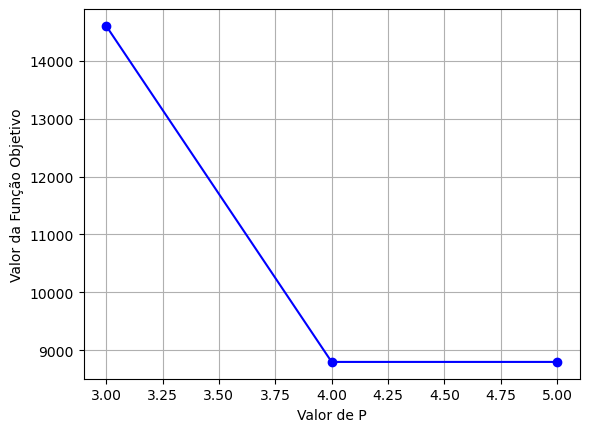

In [4]:
x = [3, 4, 5]
y = [14600, 8800, 8800]

plt.plot(x, y, '-ob')
plt.xlabel('Valor de P')
plt.ylabel('Valor da Função Objetivo')
plt.grid()
plt.show()

O problema mostrou-se infactível para os casos quando P é igual a 1 ou a 2, a partir de 3 tornou-se factível, tendo solução ótima a partir de P = 4

----

<h2 style="color: #A5FAB0;font-weight: bold">Instância 2</h2>

In [5]:
P = 10
Q = 6

#Dados da Instância

vCustos = [
    [16750, 3200, 8220, 9780, 8120, 30800],
    [14600, 15520, 11640, 600, 3465, 13200],
    [19250, 19200, 17100, 3000, 6650, 8800],
    [3800, 10840, 6516, 6270, 4655, 25531],
    [9220, 13168, 8400, 3048, 2177, 19767],
    [16750, 3200, 8220, 9780, 8120, 30800],
    [14600, 15520, 11640, 600, 3465, 13200],
    [19250, 19200, 17100, 3000, 6650, 8800],
    [3800, 10840, 6516, 6270, 4655, 25531],
    [9220, 13168, 8400, 3048, 2177, 19767],
]

vDemanda = [10, 8, 12, 6, 7, 11]

vCapacidade = [18, 24, 27, 22, 31, 18, 24, 40, 22, 31]

vCustoFixo = [7650, 3500, 5000, 4100, 2200, 8000, 350, 5000, 410, 220]

# Adicionando os dados em listas e dicionários
CDs = list()

for i in range(P):
    CDs.append(f'CD{i + 1}')

cidades = list()

for i in range(Q):
    cidades.append(f'cidade{i + 1}')

custos = dict()

for i in range(P):
    for j in range(Q):
        inP = CDs[i]
        inQ = cidades[j]
        custos[inP, inQ] = vCustos[i][j]

demanda = dict()

for i in range(Q):
    aux = cidades[i]
    demanda[aux] = vDemanda[i]

capacidade = dict()
custoFixo = dict()

for i in range(P):
    aux = CDs[i]
    capacidade[aux] = vCapacidade[i]
    custoFixo[aux] = vCustoFixo[i]

m1 = gp.Model()

# Variáveis do problema
x = m1.addVars(CDs, cidades, vtype=gp.GRB.BINARY)
y = m1.addVars(CDs, vtype=gp.GRB.BINARY)
r = m1.addVar(vtype=GRB.INTEGER, lb=0)

# Função Objetivo do problema
m1.setObjective(r, GRB.MINIMIZE)

# Restrições do problema
m1.addConstrs((r >= gp.quicksum(custos[i, j] * x[i, j] for i in CDs) for j in cidades))
m1.addConstrs((x[i, j] <= y[i] for i in CDs for j in cidades))
m1.addConstrs((gp.quicksum(x[i, j] for i in CDs) == 1 for j in cidades))
m1.addConstrs((gp.quicksum(demanda[j] * x[i, j] for j in cidades) <= capacidade[i] * y[i] for i in CDs))
m1.addConstr(gp.quicksum(y[i] for i in CDs) == P)

m1.optimize()

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (linux64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11370H @ 3.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 83 rows, 71 columns and 326 nonzeros
Model fingerprint: 0x418937fd
Variable types: 0 continuous, 71 integer (70 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Found heuristic solution: objective 19250.000000
Presolve removed 62 rows and 16 columns
Presolve time: 0.00s
Presolved: 21 rows, 55 columns, 137 nonzeros
Variable types: 0 continuous, 55 integer (54 binary)

Root relaxation: objective 8.800000e+03, 7 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 880

Essa instância é infactível até o caso de P = 2, e sua solução ótima aparece a partir de P = 4. Ou seja, o fato do número de centros ser aumentado acaba não afetando a solução ótima

----

<h2 style="color: #A5FAB0;font-weight: bold">Instância 3</h2>

In [6]:
P = 7
Q = 6

#Dados da Instância

vCustos = [
    [16750, 3200, 8220, 9780, 8120, 30800],
    [14600, 15520, 11640, 600, 3465, 13200],
    [19250, 19200, 17100, 3000, 6650, 8800],
    [3800, 10840, 6516, 6270, 4655, 25531],
    [9220, 13168, 8400, 3048, 2177, 19767],
    [16750, 3200, 8220, 9780, 8120, 30800],
    [14600, 15520, 11640, 600, 3465, 13200],
    [19250, 19200, 17100, 3000, 6650, 8800],
    [3800, 10840, 6516, 6270, 4655, 25531],
    [9220, 13168, 8400, 3048, 2177, 19767],
]

vDemanda = [20, 16, 24, 12, 14, 22]

vCapacidade = [18, 24, 27, 22, 31, 18, 24, 40, 22, 31]

vCustoFixo = [7650, 3500, 5000, 4100, 2200, 8000, 350, 5000, 410, 220]

# Adicionando os dados em listas e dicionários
CDs = list()

for i in range(P):
    CDs.append(f'CD{i + 1}')

cidades = list()

for i in range(Q):
    cidades.append(f'cidade{i + 1}')

custos = dict()

for i in range(P):
    for j in range(Q):
        inP = CDs[i]
        inQ = cidades[j]
        custos[inP, inQ] = vCustos[i][j]

demanda = dict()

for i in range(Q):
    aux = cidades[i]
    demanda[aux] = vDemanda[i]

capacidade = dict()
custoFixo = dict()

for i in range(P):
    aux = CDs[i]
    capacidade[aux] = vCapacidade[i]
    custoFixo[aux] = vCustoFixo[i]

m = gp.Model()

# Variáveis do problema
x = m.addVars(CDs, cidades, vtype=gp.GRB.BINARY)
y = m.addVars(CDs, vtype=gp.GRB.BINARY)
r = m.addVar(vtype=GRB.INTEGER, lb=0)

# Função Objetivo do problema
m.setObjective(r, GRB.MINIMIZE)

# Restrições do problema
m.addConstrs((r >= gp.quicksum(custos[i, j] * x[i, j] for i in CDs) for j in cidades))
m.addConstrs((x[i, j] <= y[i] for i in CDs for j in cidades))
m.addConstrs((gp.quicksum(x[i, j] for i in CDs) == 1 for j in cidades))
m.addConstrs((gp.quicksum(demanda[j] * x[i, j] for j in cidades) <= capacidade[i] * y[i] for i in CDs))

m.optimize()

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (linux64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11370H @ 3.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 61 rows, 50 columns and 223 nonzeros
Model fingerprint: 0xa633b594
Variable types: 0 continuous, 50 integer (49 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 19767.000000
Presolve removed 43 rows and 15 columns
Presolve time: 0.00s
Presolved: 18 rows, 35 columns, 90 nonzeros
Variable types: 0 continuous, 35 integer (34 binary)

Root relaxation: objective 8.800000e+03, 7 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0     

No caso dessa instância, ela é infactível até P = 4, e sua solução ótima a partir de P = 6, o que mostra que o aumento da demanda influencia no problema

----

<h2 style="color: #A5FAB0;font-weight: bold">Instância 4</h2>

In [7]:
P = 5
Q = 12

#Dados da Instância

vCustos = [
    [16750, 3200, 8220, 9780, 8120, 30800, 16750, 3200, 8220, 9780, 8120, 30800],
    [14600, 15520, 11640, 600, 3465, 13200, 14600, 15520, 11640, 600, 3465, 13200],
    [19250, 19200, 17100, 3000, 6650, 8800, 19250, 19200, 17100, 3000, 6650, 8800],
    [3800, 10840, 6516, 6270, 4655, 25531, 3800, 10840, 6516, 6270, 4655, 25531],
    [9220, 13168, 8400, 3048, 2177, 19767, 9220, 13168, 8400, 3048, 2177, 19767]
]

vDemanda = [10, 8, 12, 6, 7, 11, 10, 8, 12, 6, 7, 11]

vCapacidade = [18, 24, 27, 22, 31]

vCustoFixo = [7650, 3500, 5000, 4100, 2200]

# Adicionando os dados em listas e dicionários
CDs = list()

for i in range(P):
    CDs.append(f'CD{i + 1}')

cidades = list()

for i in range(Q):
    cidades.append(f'cidade{i + 1}')

custos = dict()

for i in range(P):
    for j in range(Q):
        inP = CDs[i]
        inQ = cidades[j]
        custos[inP, inQ] = vCustos[i][j]

demanda = dict()

for i in range(Q):
    aux = cidades[i]
    demanda[aux] = vDemanda[i]

capacidade = dict()
custoFixo = dict()

for i in range(P):
    aux = CDs[i]
    capacidade[aux] = vCapacidade[i]
    custoFixo[aux] = vCustoFixo[i]

m = gp.Model()

# Variáveis do problema
x = m.addVars(CDs, cidades, vtype=gp.GRB.BINARY)
y = m.addVars(CDs, vtype=gp.GRB.BINARY)
r = m.addVar(vtype=GRB.INTEGER, lb=0)

# Função Objetivo do problema
m.setObjective(r, GRB.MINIMIZE)

# Restrições do problema
m.addConstrs((r >= gp.quicksum(custos[i, j] * x[i, j] for i in CDs) for j in cidades))
m.addConstrs((x[i, j] <= y[i] for i in CDs for j in cidades))
m.addConstrs((gp.quicksum(x[i, j] for i in CDs) == 1 for j in cidades))
m.addConstrs((gp.quicksum(demanda[j] * x[i, j] for j in cidades) <= capacidade[i] * y[i] for i in CDs))
#m.addConstr(gp.quicksum(y[i] for i in CDs) <= P)

m.optimize()

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (linux64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11370H @ 3.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 89 rows, 66 columns and 317 nonzeros
Model fingerprint: 0x89558d70
Variable types: 0 continuous, 66 integer (65 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 25531.000000
Presolve removed 62 rows and 7 columns
Presolve time: 0.00s
Presolved: 27 rows, 59 columns, 154 nonzeros
Variable types: 0 continuous, 59 integer (58 binary)

Root relaxation: objective 8.800000e+03, 19 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 880

Devido ao fato de que o número de cidades dobrou, percebe-se que o problema tornou-se mais complexo, exigindo mais interações até chegar na solução ótima. Além disso, essa instância possui solução ótima apenas para P = 5, em todos os outros casos ela é infactível.

----

<h2 style="color: #A5FAB0;font-weight: bold">O Problema dos P centros na literatura</h2>

<h2 style="color: #A5FAB0;font-size: 24px">
Problema 1
</h2>

Podem haver algumas variações, porém como métodos muito similares, como é o caso de um estudo envolvendo o problema dos P centros onde o objetivo era minimizar a distância entre as facilidades de tratamento da dengue e os focos da doença. O estudo em questão foi feito devido a uma epidemia de dengue que ocorreu anos atrás na cidade de Salvador.

### Variáveis

$x_{ij}$ : Variável binária que indica se o nó j está alocado no centro i

$d_{ij}$ : Distância entre os nós

$dMax$ : Maior distância associada a um foco de doença e sua respectiva facilidade

#### Modelagem

Função Objetivo:

Min z = dMax

Restrições:

dMax $\geq x_{ij}d_{ij} ,i = 1,2,...,m; j = 1,2,...,n$

$\sum_{j}^{n} x_{jj}= f$

$x_{ij} \leq x_{jj}$

$x_{ij} \in$ {0,1}

Esse problema usou a versão 11 do CPLEX da ILOG para resolução do seu problema de otimização

<h2 style="color: #A5FAB0;font-size: 24px">
Problema 2
</h2>

Outro exemplo de variação do problema é o de Localização de Facilidades de P-centros para emergências em larga escala. A literatura mostra que sobre a importância da existência de facilidades de serviços de emergência, como ambulâncias, quarteis de corpo de bombeiros e etc, e como a pesquisa operacional pode solucionar esse por meio da implementação do modelo a seguir.

### Variáveis

$x_{ij}$ : Variável binária se o nó i é atendido pela facilidade do nó j

$y_{j}$ : Variável binária se a facilidade está no nó j

p : número de facilidades que serão alocadas

$x_{jj}$ : Quantidade de nós com um consumidor i e uma facilidade j instalados no mesmo lugar

$\omega_{i}$ : Peso da distância ao nó i

### Modelagem

#### Função Objetivo

Min Z

#### Restrições

$\sum_{n}{j=1} x_{ij = 1}$ $\forall i \in N$

$x_{ij} \leq y_{i}$ $\forall i,j \in N$

$\sum_{n}{j=1} y_{i} = p$

$\sum_{n}{j=1} \omega_{i}d_{ij}x_{ij} \leq Z$ $\forall i \in N$

$x_{jj} = 0$ $\forall j \in N$

$x_{ij},y_{i} \in$ {0,1} $\forall i,j \in N$

Para a resolução desse problema foi utilizada a versão 9.1 do ILOG CPLEX

<h2 style="color: #A5FAB0;font-size: 24px">
Referências bibliográficas
</h2>

Huang, R., Kim, S. and Menezes, M.B., 2010. Facility location for large-scale emergencies. Annals of Operations Research, 181, pp.271-286.

Junior, R.R. and Santos, L.B.L., ANÁLISE ITERATIVA DOS PROBLEMAS DE P-CENTROS E P-MEDIANAS PARA UM CRESCENTE NÚMERO DE FACILIDADES: ESTUDO DE CASO NA EPIDEMIA DE DENGUE, SALVADOR, 1995. In 9th Brazilian Conference on Dynamics Control and Their Applications.
